In [1]:
import math
from decimal import Decimal

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from Helper import norm_list, to_dist_list

In [2]:
%matplotlib inline
sns.set(font_scale=1.10)
# plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
matplotlib.rcParams.update({'figure.autolayout': True})

raptor_dist = [0, 10241, 491582, 712794, 831695, 831695, 831695, 831695, 831695, 831695, 948446, 1032189, 1032189,
               1032189, 1032189, 1032189, 1032189, 1032189, 1032189, 1032189, 1032189, 1032189, 1032189, 1032189,
               1032189, 1032189, 1032189, 1032189, 1032189, 1032189, 1032189, 1032189, 1032189, 1032189, 1032189,
               1032189, 1032189, 1032189, 1032189, 1032189, 1048576]

ez_robust_dist = [0.023562333363729804, 0.4170269125229677, 0.5512718027759727, 0.6199392631691046, 0.6620667485649615, 0.6907697449355179, 0.7117133181335238, 0.7277520727320201, 0.7404841621864, 0.7508758357854546, 0.759546661304677, 0.7669128051706923, 0.7732645434624459, 0.7788107597081224, 0.7837057670410399, 0.7880661492206742, 0.7919817076997616, 0.7955227929596026, 0.7987453434646052, 0.8016944288748958, 0.8044067923013483, 0.8069127075011525, 0.8092373577096685, 0.8114018743558798, 0.8134241299757269, 0.8153193508297388, 0.8171005954712023, 0.8187791324044125, 0.8203647409077455, 0.8218659527329247, 0.8232902478631458, 0.824644214248534, 0.825933679056777, 0.8271638172213974, 0.828339241762493, 0.8294640793713051, 0.8305420340036646, 0.8315764406562267, 0.8325703110588596, 0.8335263726741811, 0.9862809556490806, 0.9867271745661067, 0.987152639114899, 0.987558764366019, 0.9879468396059781, 0.9883180420094172, 0.9886734485659014, 0.9890140465158656, 0.9893407425086882, 0.989654370661798, 0.9899556996716485, 0.9902454391041972, 0.9905242449732534, 0.9907927246990113, 0.9910514415256506, 0.9913009184656243, 0.9915416418287568, 0.991774064386264, 0.9919986082130083, 0.9922156672455278, 0.9924256095884565, 0.9926287795977423, 0.9928254997654635, 0.9930160724279434, 0.9932007813161932, 0.9933798929654051, 0.9935536579982226, 0.9937223122947807, 0.9938860780610038, 0.9940451648053349, 0.9941997702329242, 0.9943500810653026, 0.9944962737926845, 0.9946385153652721, 0.9947769638292575, 0.9949117689126117, 0.9950430725652294, 0.9951710094575236, 0.995295707441152, 0.9954172879751898, 0.9955358665207329, 0.9956515529066285, 0.9957644516687677, 0.9958746623651417, 0.9959822798686597, 0.9960873946395379, 0.9961900929789016, 0.9962904572650979, 0.9963885661740763, 0.9964844948850774, 0.9965783152727598, 0.9966700960867969, 0.996759903119887, 0.9968477993650391, 0.9969338451629247, 0.9970180983400211, 0.9971006143382083, 0.9971814463364325, 0.9972606453649956, 0.9973382604129875, 0.9974143385293358, 0.9974889249179126, 0.9975620630270997, 0.997633794634187, 0.9977041599249488, 0.9977731975687151, 0.9978409447892334, 0.9979074374315939, 0.9979727100254708, 0.9980367958449136, 0.9980997269649069, 0.9981615343149004, 0.9982222477294957, 0.9982818959964667, 0.9983405069022728, 0.9983981072752203, 0.9984547230264079, 0.9985103791885924, 0.9985650999530932, 0.9986189087048521, 0.9986718280557556, 0.9987238798763164, 0.9987750853258112, 0.9988254648809592, 0.998875038363225, 0.9989238249648198, 0.9989718432734761, 0.9990191112960597, 0.9990656464810839, 0.9991114657401846, 0.9991565854686121, 0.9992010215647906, 0.9992447894489965, 0.9992879040811994, 0.9993303799781104, 0.9993722312294785, 0.9994134715136733, 0.99945411411259, 0.9994941719259107, 0.9995336574847555, 0.9995725829647514, 0.9996109601985501, 0.9996488006878202, 0.9996861156147394, 0.9997229158530114, 0.9997592119784303, 0.9997950142790136, 0.9998303327647242, 0.9998651771768011, 0.999899556996717, 0.9999334814547796, 0.999966959538394, 1.0000000000000004]

In [3]:
def plot_max_possible_unique_packets_per_deg(n, seed_len=2):
    # calculate
    lst = []
    max_deg = len(ez_robust_dist)-1
    print(max_deg)
    for i in range(1, max_deg + 1):
        if n > 49999 and (i > 1 and lst[-1] > 2.6720589553888095e+138):
            #pass
            lst.append(lst[-1])
        else:
            lst.append(math.comb(n, i))

    # Create a figure and the primary y-axis
    fig, ax1 = plt.subplots()

    # Plot the primary y-axis data
    ax1.plot(range(1, max_deg + 1), lst, label="Combinations", color="tab:blue")
    ax1.set_yscale("log")
    ax1.set_xlabel("Degree")
    ax1.set_ylabel("Packets")
    ax1.set_title("Number of unique packets per degree")
    ax1.tick_params(axis="y", labelcolor="tab:blue")
    raptor_dist_func = norm_list(to_dist_list(raptor_dist))
    raptor_dist_func = norm_list(to_dist_list(ez_robust_dist))
    print(raptor_dist_func)

    possible_packets = math.pow(2, (seed_len * 8))
    res = [x * possible_packets for x in raptor_dist_func]
    ax1.plot(range(1, max_deg + 1), res[:max_deg], label="Possible packets (R. soliton)", color="tab:cyan")
    ax1.set_ylim([0.0001720829380504742, 2.6720589553888095e+138])
    print(ax1.get_ylim())
    # Create a secondary y-axis
    ax2 = ax1.twinx()

    # Plot the secondary y-axXis data
    ax2.plot(range(1, max_deg + 1), raptor_dist_func[:max_deg], label="R. soliton distribution", color="tab:red")
    ax2.set_ylabel("Probability")
    ax2.tick_params(axis="y", labelcolor="tab:red")
    # Combine legends from both axes
    # ax1.legend(loc="upper left")
    # ax2.legend(loc="upper right")
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    lines = lines1 + lines2
    labels = labels1 + labels2
    ax2.legend(lines, labels, loc="right")
    plt.autoscale()

    plt.savefig(f"ez_max_unique_packets_per_deg_{n}_{seed_len}.svg", format="svg", dpi=1200)
    plt.savefig(f"ez_max_unique_packets_per_deg_{n}_{seed_len}.pdf", bbox_inches="tight")
    plt.show(block=False)

152
[0.4029592390824943, 0.1374843421551578, 0.07032446897474211, 0.043144060123143146, 0.029395625907627395, 0.021448960761780506, 0.016425784406441678, 0.01303932641009296, 0.01064243418102954, 0.008880060464169209, 0.007543895650186181, 0.006505011542246947, 0.005680051512947758, 0.005013128333916373, 0.004465602187035022, 0.004010044484023365, 0.0036265348837265397, 0.0033003135941119554, 0.003020249536716357, 0.0027778152350433623, 0.0025663852239916954, 0.0023807461427867763, 0.00221674841126096, 0.0020710544963033865, 0.0019409542654584314, 0.0018242277027264438, 0.0017190415635977817, 0.00162387068577072, 0.0015374374386342387, 0.0014586646735245002, 0.0013866388317981253, 0.0013205807726417056, 0.0012598225228837982, 0.0012037886096147405, 0.0011519809684186536, 0.0011039666628930194, 0.0010593678305401567, 0.0010178534038497947, 0.0009791322559431822, 0.1564406906803623, 0.0004569865873397727, 0.0004357313972309302, 0.0004159254246295088, 0.00039743985020157605, 0.00038015985

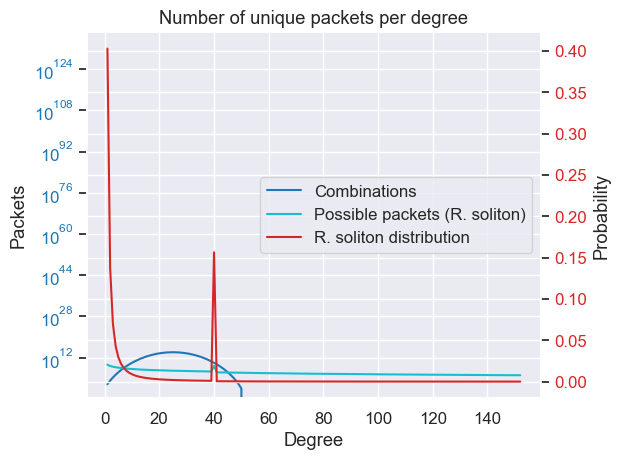

152
[0.4029592390824943, 0.1374843421551578, 0.07032446897474211, 0.043144060123143146, 0.029395625907627395, 0.021448960761780506, 0.016425784406441678, 0.01303932641009296, 0.01064243418102954, 0.008880060464169209, 0.007543895650186181, 0.006505011542246947, 0.005680051512947758, 0.005013128333916373, 0.004465602187035022, 0.004010044484023365, 0.0036265348837265397, 0.0033003135941119554, 0.003020249536716357, 0.0027778152350433623, 0.0025663852239916954, 0.0023807461427867763, 0.00221674841126096, 0.0020710544963033865, 0.0019409542654584314, 0.0018242277027264438, 0.0017190415635977817, 0.00162387068577072, 0.0015374374386342387, 0.0014586646735245002, 0.0013866388317981253, 0.0013205807726417056, 0.0012598225228837982, 0.0012037886096147405, 0.0011519809684186536, 0.0011039666628930194, 0.0010593678305401567, 0.0010178534038497947, 0.0009791322559431822, 0.1564406906803623, 0.0004569865873397727, 0.0004357313972309302, 0.0004159254246295088, 0.00039743985020157605, 0.00038015985

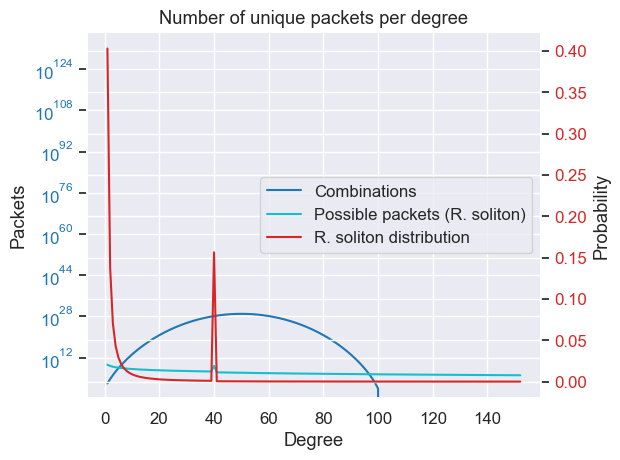

152
[0.4029592390824943, 0.1374843421551578, 0.07032446897474211, 0.043144060123143146, 0.029395625907627395, 0.021448960761780506, 0.016425784406441678, 0.01303932641009296, 0.01064243418102954, 0.008880060464169209, 0.007543895650186181, 0.006505011542246947, 0.005680051512947758, 0.005013128333916373, 0.004465602187035022, 0.004010044484023365, 0.0036265348837265397, 0.0033003135941119554, 0.003020249536716357, 0.0027778152350433623, 0.0025663852239916954, 0.0023807461427867763, 0.00221674841126096, 0.0020710544963033865, 0.0019409542654584314, 0.0018242277027264438, 0.0017190415635977817, 0.00162387068577072, 0.0015374374386342387, 0.0014586646735245002, 0.0013866388317981253, 0.0013205807726417056, 0.0012598225228837982, 0.0012037886096147405, 0.0011519809684186536, 0.0011039666628930194, 0.0010593678305401567, 0.0010178534038497947, 0.0009791322559431822, 0.1564406906803623, 0.0004569865873397727, 0.0004357313972309302, 0.0004159254246295088, 0.00039743985020157605, 0.00038015985

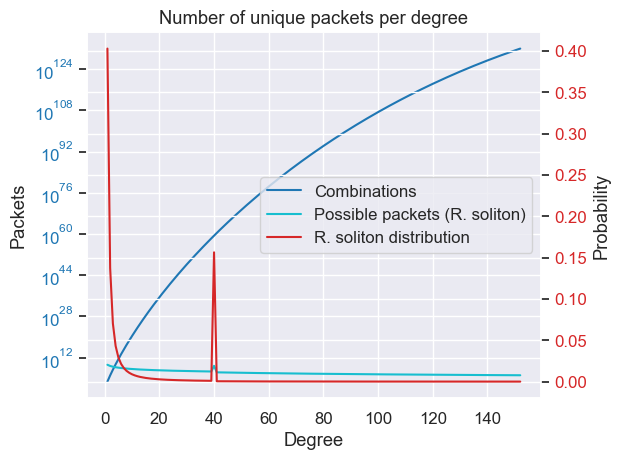

152
[0.4029592390824943, 0.1374843421551578, 0.07032446897474211, 0.043144060123143146, 0.029395625907627395, 0.021448960761780506, 0.016425784406441678, 0.01303932641009296, 0.01064243418102954, 0.008880060464169209, 0.007543895650186181, 0.006505011542246947, 0.005680051512947758, 0.005013128333916373, 0.004465602187035022, 0.004010044484023365, 0.0036265348837265397, 0.0033003135941119554, 0.003020249536716357, 0.0027778152350433623, 0.0025663852239916954, 0.0023807461427867763, 0.00221674841126096, 0.0020710544963033865, 0.0019409542654584314, 0.0018242277027264438, 0.0017190415635977817, 0.00162387068577072, 0.0015374374386342387, 0.0014586646735245002, 0.0013866388317981253, 0.0013205807726417056, 0.0012598225228837982, 0.0012037886096147405, 0.0011519809684186536, 0.0011039666628930194, 0.0010593678305401567, 0.0010178534038497947, 0.0009791322559431822, 0.1564406906803623, 0.0004569865873397727, 0.0004357313972309302, 0.0004159254246295088, 0.00039743985020157605, 0.00038015985

D:\PycharmProjects\OFC4DNA\twichplay\Lib\site-packages\matplotlib\scale.py:253: RuntimeWarning: overflow encountered in power
  return np.power(self.base, a)


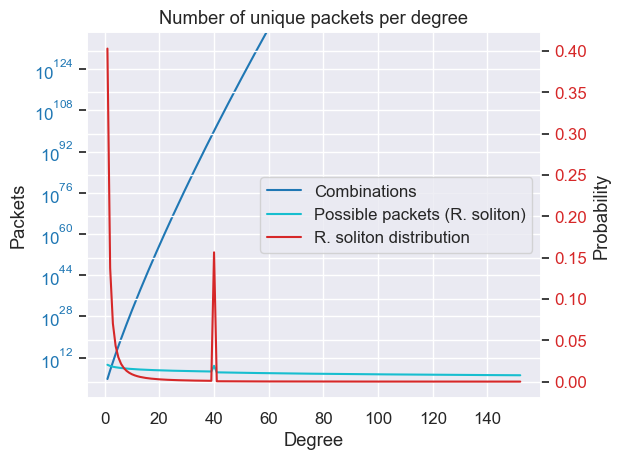

152
[0.4029592390824943, 0.1374843421551578, 0.07032446897474211, 0.043144060123143146, 0.029395625907627395, 0.021448960761780506, 0.016425784406441678, 0.01303932641009296, 0.01064243418102954, 0.008880060464169209, 0.007543895650186181, 0.006505011542246947, 0.005680051512947758, 0.005013128333916373, 0.004465602187035022, 0.004010044484023365, 0.0036265348837265397, 0.0033003135941119554, 0.003020249536716357, 0.0027778152350433623, 0.0025663852239916954, 0.0023807461427867763, 0.00221674841126096, 0.0020710544963033865, 0.0019409542654584314, 0.0018242277027264438, 0.0017190415635977817, 0.00162387068577072, 0.0015374374386342387, 0.0014586646735245002, 0.0013866388317981253, 0.0013205807726417056, 0.0012598225228837982, 0.0012037886096147405, 0.0011519809684186536, 0.0011039666628930194, 0.0010593678305401567, 0.0010178534038497947, 0.0009791322559431822, 0.1564406906803623, 0.0004569865873397727, 0.0004357313972309302, 0.0004159254246295088, 0.00039743985020157605, 0.00038015985

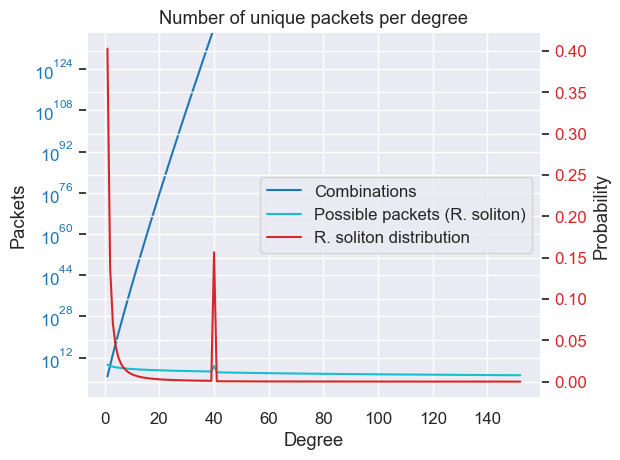

152
[0.4029592390824943, 0.1374843421551578, 0.07032446897474211, 0.043144060123143146, 0.029395625907627395, 0.021448960761780506, 0.016425784406441678, 0.01303932641009296, 0.01064243418102954, 0.008880060464169209, 0.007543895650186181, 0.006505011542246947, 0.005680051512947758, 0.005013128333916373, 0.004465602187035022, 0.004010044484023365, 0.0036265348837265397, 0.0033003135941119554, 0.003020249536716357, 0.0027778152350433623, 0.0025663852239916954, 0.0023807461427867763, 0.00221674841126096, 0.0020710544963033865, 0.0019409542654584314, 0.0018242277027264438, 0.0017190415635977817, 0.00162387068577072, 0.0015374374386342387, 0.0014586646735245002, 0.0013866388317981253, 0.0013205807726417056, 0.0012598225228837982, 0.0012037886096147405, 0.0011519809684186536, 0.0011039666628930194, 0.0010593678305401567, 0.0010178534038497947, 0.0009791322559431822, 0.1564406906803623, 0.0004569865873397727, 0.0004357313972309302, 0.0004159254246295088, 0.00039743985020157605, 0.00038015985

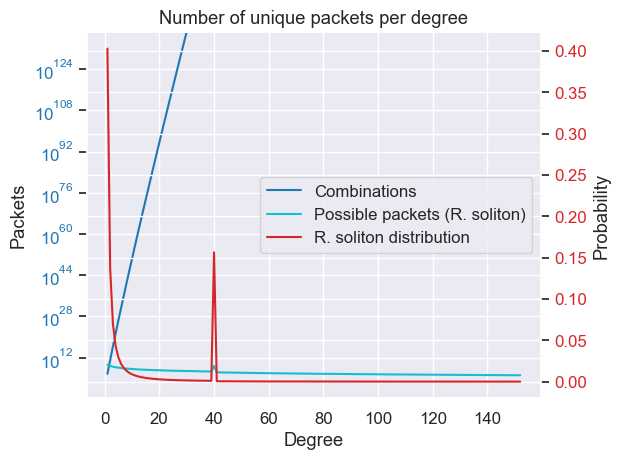

152
[0.4029592390824943, 0.1374843421551578, 0.07032446897474211, 0.043144060123143146, 0.029395625907627395, 0.021448960761780506, 0.016425784406441678, 0.01303932641009296, 0.01064243418102954, 0.008880060464169209, 0.007543895650186181, 0.006505011542246947, 0.005680051512947758, 0.005013128333916373, 0.004465602187035022, 0.004010044484023365, 0.0036265348837265397, 0.0033003135941119554, 0.003020249536716357, 0.0027778152350433623, 0.0025663852239916954, 0.0023807461427867763, 0.00221674841126096, 0.0020710544963033865, 0.0019409542654584314, 0.0018242277027264438, 0.0017190415635977817, 0.00162387068577072, 0.0015374374386342387, 0.0014586646735245002, 0.0013866388317981253, 0.0013205807726417056, 0.0012598225228837982, 0.0012037886096147405, 0.0011519809684186536, 0.0011039666628930194, 0.0010593678305401567, 0.0010178534038497947, 0.0009791322559431822, 0.1564406906803623, 0.0004569865873397727, 0.0004357313972309302, 0.0004159254246295088, 0.00039743985020157605, 0.00038015985

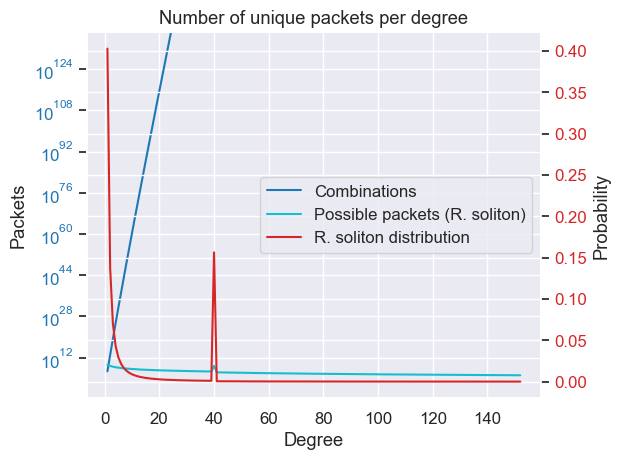

In [4]:
    plot_max_possible_unique_packets_per_deg(50, 4)
    plot_max_possible_unique_packets_per_deg(100, 4)
    plot_max_possible_unique_packets_per_deg(500, 4)
    plot_max_possible_unique_packets_per_deg(5000, 4)
    plot_max_possible_unique_packets_per_deg(50000, 4)
    plot_max_possible_unique_packets_per_deg(500000, 4)
    plot_max_possible_unique_packets_per_deg(5000000, 4)

In [4]:
    plot_max_possible_unique_packets_per_deg(50)
    plot_max_possible_unique_packets_per_deg(100)
    plot_max_possible_unique_packets_per_deg(500)
    plot_max_possible_unique_packets_per_deg(5000)
    plot_max_possible_unique_packets_per_deg(50000)

    plot_max_possible_unique_packets_per_deg(50, 4)
    plot_max_possible_unique_packets_per_deg(100, 4)
    plot_max_possible_unique_packets_per_deg(500, 4)
    plot_max_possible_unique_packets_per_deg(5000, 4)
    plot_max_possible_unique_packets_per_deg(50000, 4)